In [63]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import category encoders
import category_encoders as ce

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### __Preprocessing Steps__
> - #### Import all the datasets in csv

### Step 1. Import all datasets

In [3]:
# Import training csv file
train_df = pd.read_csv('combined_reduced_flights.csv')
train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 43 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fl_date              1562048 non-null  object 
 1   mkt_unique_carrier   1562048 non-null  object 
 2   branded_code_share   1562048 non-null  object 
 3   mkt_carrier          1562048 non-null  object 
 4   mkt_carrier_fl_num   1562048 non-null  int64  
 5   op_unique_carrier    1562048 non-null  object 
 6   tail_num             1562048 non-null  object 
 7   op_carrier_fl_num    1562048 non-null  int64  
 8   origin_airport_id    1562048 non-null  int64  
 9   origin               1562048 non-null  object 
 10  origin_city_name     1562048 non-null  object 
 11  dest_airport_id      1562048 non-null  int64  
 12  dest                 1562048 non-null  object 
 13  dest_city_name       1562048 non-null  object 
 14  crs_dep_time         1562048 non-null  int64  
 15

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,1.0,0.0,0.0,0.0,98.0,NaN,NaN,NaN,NaN,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
# Import testing csv file
test_df = pd.read_csv('flights_test.csv')
test_df.info()
test_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660556 entries, 0 to 660555
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   fl_date             660556 non-null  object
 1   mkt_unique_carrier  660556 non-null  object
 2   branded_code_share  660556 non-null  object
 3   mkt_carrier         660556 non-null  object
 4   mkt_carrier_fl_num  660556 non-null  int64 
 5   op_unique_carrier   660556 non-null  object
 6   tail_num            659057 non-null  object
 7   op_carrier_fl_num   660556 non-null  int64 
 8   origin_airport_id   660556 non-null  int64 
 9   origin              660556 non-null  object
 10  origin_city_name    660556 non-null  object
 11  dest_airport_id     660556 non-null  int64 
 12  dest                660556 non-null  object
 13  dest_city_name      660556 non-null  object
 14  crs_dep_time        660556 non-null  int64 
 15  crs_arr_time        660556 non-null  int64 
 16  du

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333


In [5]:
# Import passengers csv file
passengers = pd.read_csv('passengers.csv')
passengers.info()
passengers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350497 entries, 0 to 2350496
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,2.0,4000.0,16.0,0.0,0.0,0.0,223.0,126.0,91.0,...,US,United States,6,651,1,2015,6,1,L,DU
1,0.0,1.0,2000.0,8.0,1.0,0.0,0.0,236.0,100.0,45.0,...,US,United States,6,651,1,2015,6,1,L,DU
2,0.0,1.0,3000.0,13.0,0.0,0.0,0.0,386.0,80.0,63.0,...,US,United States,6,641,1,2015,6,1,L,DU


In [6]:
# Import fuel_consumption csv file
fuel = pd.read_csv('fuel_consumption.csv')
fuel.info()
fuel.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3035 non-null   int64  
 1   airline_id         3034 non-null   float64
 2   unique_carrier     3034 non-null   object 
 3   carrier            3035 non-null   object 
 4   carrier_name       3034 non-null   object 
 5   carrier_group_new  3035 non-null   int64  
 6   sdomt_gallons      3034 non-null   float64
 7   satl_gallons       3034 non-null   float64
 8   spac_gallons       3034 non-null   float64
 9   slat_gallons       3033 non-null   float64
 10  sint_gallons       3034 non-null   float64
 11  ts_gallons         3034 non-null   float64
 12  tdomt_gallons      3032 non-null   float64
 13  tint_gallons       3034 non-null   float64
 14  total_gallons      3029 non-null   float64
 15  sdomt_cost         3035 non-null   float64
 16  satl_cost          3034 

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


### Step 2. Preprocessing: Training Dataset

In [11]:
# remove columns that are not in testing datasets

# get list of columns in test_df
test_colnames = test_df.columns.tolist()
test_colnames

# get list of columns in test_df
train_colnames = train_df.columns.tolist()
train_colnames

# identify the target columns in train_df
target_columns = ['arr_delay', 'target_class']

# get the list of columns to be removed from train_df
remove_columns = list(set(train_colnames) - set(test_colnames) - set(target_columns))
remove_columns

# remove the columns identified above from train_df
train_df = train_df.drop(columns = remove_columns)
train_df.info()
train_df

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'crs_arr_time',
 'dup',
 'crs_elapsed_time',
 'flights',
 'distance']

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name',
 'target_class']

['no_name',
 'first_dep_time',
 'actual_elapsed_time',
 'carrier_delay',
 'cancellation_code',
 'wheels_off',
 'taxi_in',
 'longest_add_gtime',
 'arr_time',
 'dep_delay',
 'cancelled',
 'weather_delay',
 'security_delay',
 'taxi_out',
 'dep_time',
 'air_time',
 'nas_delay',
 'late_aircraft_delay',
 'wheels_on',
 'diverted',
 'total_add_gtime']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fl_date             1562048 non-null  object 
 1   mkt_unique_carrier  1562048 non-null  object 
 2   branded_code_share  1562048 non-null  object 
 3   mkt_carrier         1562048 non-null  object 
 4   mkt_carrier_fl_num  1562048 non-null  int64  
 5   op_unique_carrier   1562048 non-null  object 
 6   tail_num            1562048 non-null  object 
 7   op_carrier_fl_num   1562048 non-null  int64  
 8   origin_airport_id   1562048 non-null  int64  
 9   origin              1562048 non-null  object 
 10  origin_city_name    1562048 non-null  object 
 11  dest_airport_id     1562048 non-null  int64  
 12  dest                1562048 non-null  object 
 13  dest_city_name      1562048 non-null  object 
 14  crs_dep_time        1562048 non-null  int64  
 15  crs_arr_time   

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,dup,crs_elapsed_time,flights,distance,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,99.0,N,169.0,1.0,1158.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,2.0,N,146.0,1.0,875.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,1.0,N,177.0,1.0,875.0,1
3,2019-05-01,AA,AA_CODESHARE,AA,4648,YX,N110HQ,4648,11624,EYW,...,CLT,"Charlotte, NC",1441,1705,4.0,N,144.0,1.0,736.0,1
4,2019-05-01,AA,AA_CODESHARE,AA,4656,YX,N114HQ,4656,10868,CAE,...,CLT,"Charlotte, NC",1253,1401,15.0,N,68.0,1.0,88.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562043,2018-11-30,UA,UA_CODESHARE,UA,6140,YV,N85320,6140,12266,IAH,...,LIT,"Little Rock, AR",1433,1558,-12.0,N,85.0,1.0,374.0,0
1562044,2018-11-30,UA,UA_CODESHARE,UA,6005,YV,N87345,6005,12264,IAD,...,GSP,"Greer, SC",1720,1853,-14.0,N,93.0,1.0,384.0,0
1562045,2018-11-30,UA,UA_CODESHARE,UA,6131,YV,N503MJ,6131,12264,IAD,...,CHS,"Charleston, SC",2200,2343,-21.0,N,103.0,1.0,441.0,0
1562046,2018-11-30,UA,UA_CODESHARE,UA,6045,YV,N511MJ,6045,13931,ORF,...,IAD,"Washington, DC",1030,1127,-4.0,N,57.0,1.0,157.0,0


In [13]:
# check all the columns in testing dataset are in the training dataset
train_colnames2 = train_df.columns.tolist()
check_columns = set(train_colnames2) - set(test_colnames)
check_columns

{'arr_delay', 'target_class'}

In [16]:
# check for any missing values
train_df.isnull().sum()

#  reorder columns in train_df
rearranged_columns = ['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
                   'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
                   'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
                   'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup', 
                   'crs_elapsed_time', 'flights', 'distance', 'arr_delay','target_class']

train_df = train_df[rearranged_columns]
train_df.info()

fl_date               0
mkt_unique_carrier    0
branded_code_share    0
mkt_carrier           0
mkt_carrier_fl_num    0
op_unique_carrier     0
tail_num              0
op_carrier_fl_num     0
origin_airport_id     0
origin                0
origin_city_name      0
dest_airport_id       0
dest                  0
dest_city_name        0
crs_dep_time          0
crs_arr_time          0
arr_delay             0
dup                   0
crs_elapsed_time      0
flights               0
distance              0
target_class          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fl_date             1562048 non-null  object 
 1   mkt_unique_carrier  1562048 non-null  object 
 2   branded_code_share  1562048 non-null  object 
 3   mkt_carrier         1562048 non-null  object 
 4   mkt_carrier_fl_num  1562048 non-null  int64  
 5   op_unique_carrier   1562048 non-null  object 
 6   tail_num            1562048 non-null  object 
 7   op_carrier_fl_num   1562048 non-null  int64  
 8   origin_airport_id   1562048 non-null  int64  
 9   origin              1562048 non-null  object 
 10  origin_city_name    1562048 non-null  object 
 11  dest_airport_id     1562048 non-null  int64  
 12  dest                1562048 non-null  object 
 13  dest_city_name      1562048 non-null  object 
 14  crs_dep_time        1562048 non-null  int64  
 15  crs_arr_time   

In [25]:
# separate columns with object types from columns with numerical types

# separate target columnms
train_target = train_df[['arr_delay', 'target_class']]

# create summary table that shows datatype for each feature in train_df
colname = train_df.iloc[:, :20].columns.tolist()
dtypes = train_df.iloc[:, :20].dtypes
train_datatype = pd.DataFrame({'columns': colname, 'Dtype': dtypes})
train_datatype.reset_index(inplace = True, drop = True)
train_datatype

# get the list of columns for features in object data type and in numerical data type
object_columns = train_datatype[train_datatype['Dtype'] == 'object']['columns']
numerical_columns = train_datatype[train_datatype['Dtype'] != 'object']['columns']

object_columns
numerical_columns

# divide train_df into two dataframes - object data type columns and numerical data type columns
train_object = train_df[object_columns]
train_numerical = train_df[numerical_columns]

train_object.info()
train_numerical.info()

,columns,Dtype
0,fl_date,object
1,mkt_unique_carrier,object
2,branded_code_share,object
3,mkt_carrier,object
4,mkt_carrier_fl_num,int64
5,op_unique_carrier,object
6,tail_num,object
7,op_carrier_fl_num,int64
8,origin_airport_id,int64
9,origin,object


0                fl_date
1     mkt_unique_carrier
2     branded_code_share
3            mkt_carrier
5      op_unique_carrier
6               tail_num
9                 origin
10      origin_city_name
12                  dest
13        dest_city_name
16                   dup
Name: columns, dtype: object

4     mkt_carrier_fl_num
7      op_carrier_fl_num
8      origin_airport_id
11       dest_airport_id
14          crs_dep_time
15          crs_arr_time
17      crs_elapsed_time
18               flights
19              distance
Name: columns, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   fl_date             1562048 non-null  object
 1   mkt_unique_carrier  1562048 non-null  object
 2   branded_code_share  1562048 non-null  object
 3   mkt_carrier         1562048 non-null  object
 4   op_unique_carrier   1562048 non-null  object
 5   tail_num            1562048 non-null  object
 6   origin              1562048 non-null  object
 7   origin_city_name    1562048 non-null  object
 8   dest                1562048 non-null  object
 9   dest_city_name      1562048 non-null  object
 10  dup                 1562048 non-null  object
dtypes: object(11)
memory usage: 131.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              ------

In [38]:
# train_object:
# 'fl_date' should be converted to datetime ('2019-05-01')
train_df['fl_date'] = pd.to_datetime(train_df['fl_date'], format='%Y-%m-%d')

# get the summary of unique values of each feature
for i in object_columns[1:]:
    print(f"\n{i}: {train_object[i].nunique()} | {train_object[i].unique()}")



mkt_unique_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'NK' 'WN' 'HA' 'AS' 'F9' 'B6' 'VX']

branded_code_share: 16 | ['AA_CODESHARE' 'DL' 'UA_CODESHARE' 'AA' 'G4' 'NK' 'DL_CODESHARE' 'WN'
 'HA' 'AS' 'UA' 'HA_CODESHARE' 'AS_CODESHARE' 'F9' 'B6' 'VX']

mkt_carrier: 11 | ['AA' 'DL' 'UA' 'G4' 'NK' 'WN' 'HA' 'AS' 'F9' 'B6' 'VX']

op_unique_carrier: 28 | ['YX' 'DL' 'YV' 'AA' 'G4' 'NK' '9E' 'MQ' 'WN' 'PT' 'OH' 'HA' 'AS' 'UA'
 'EM' 'OO' 'C5' 'ZW' 'AX' 'G7' 'F9' 'QX' 'B6' 'CP' 'EV' 'KS' 'VX' '9K']

tail_num: 6460 | ['N436YX' 'N102HQ' 'N110HQ' ... 'N153DL' 'N801NW' 'N363PH']

origin: 375 | ['OKC' 'MEM' 'PHL' 'EYW' 'CAE' 'IND' 'DFW' 'LAX' 'CLT' 'DTW' 'ORD' 'JFK'
 'BNA' 'GSO' 'ORF' 'ATL' 'SEA' 'TPA' 'MDW' 'ELP' 'AUS' 'SLC' 'FSD' 'BOS'
 'MSP' 'TVC' 'LGA' 'MKE' 'GRB' 'RDU' 'LAS' 'SNA' 'IAH' 'COS' 'MIA' 'MAF'
 'SGF' 'AZA' 'EWR' 'DAY' 'MSY' 'DAB' 'DEN' 'SDF' 'SAV' 'DCA' 'MCO' 'TLH'
 'OAK' 'GSP' 'ICT' 'STL' 'PDX' 'CMH' 'LBB' 'TUL' 'CLL' 'ABE' 'FAR' 'ABI'
 'SUX' 'MCI' 'SRQ' 'PHX' 'PIT' 'PVD' 'RNO' 'SAT' 'MDT' '

In [27]:
# train_numerical:
train_numerical.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance
count,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1.562048e+06,1562048.0,1.562048e+06
mean,2.721355e+03,2.721298e+03,1.268052e+04,1.268778e+04,1.345302e+03,1.499342e+03,1.385317e+02,1.0,7.737580e+02
std,1.859142e+03,1.859181e+03,1.521618e+03,1.523261e+03,4.882776e+02,5.183357e+02,7.180470e+01,0.0,5.873406e+02
min,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-1.120000e+02,1.0,1.600000e+01
25%,1.117000e+03,1.117000e+03,1.129200e+04,1.129200e+04,9.300000e+02,1.110000e+03,8.700000e+01,1.0,3.440000e+02
50%,2.302000e+03,2.302000e+03,1.288900e+04,1.288900e+04,1.339000e+03,1.529000e+03,1.200000e+02,1.0,6.070000e+02
75%,4.296000e+03,4.295000e+03,1.405700e+04,1.405700e+04,1.745000e+03,1.925000e+03,1.680000e+02,1.0,1.009000e+03
max,9.400000e+03,9.400000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,1.538000e+03,1.0,5.095000e+03


Max arr_delay (in minutes): 2695.0 | Median arr_delay: 0.0 | Min arr_delay: -241.0


(array([3.05265419e-08, 6.08915548e-03, 6.30983621e-04, 6.70842563e-05,
        1.21452027e-05, 4.18213624e-06, 2.94799176e-06, 2.42031868e-06,
        1.60482392e-06, 7.93690089e-07, 3.48874764e-07, 1.91881120e-07,
        6.54140183e-08, 8.72186911e-09, 8.72186911e-09, 1.30828037e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36093456e-09]),
 array([-241. ,  -94.2,   52.6,  199.4,  346.2,  493. ,  639.8,  786.6,
         933.4, 1080.2, 1227. , 1373.8, 1520.6, 1667.4, 1814.2, 1961. ,
        2107.8, 2254.6, 2401.4, 2548.2, 2695. ]),
 <BarContainer object of 20 artists>)

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Data - [arr_delay]')

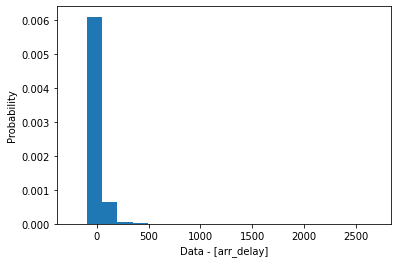

In [36]:
# target variables:
print(f"Max arr_delay (in minutes): {max(train_df['arr_delay'])} | \
Median arr_delay: {np.median(train_df['arr_delay'].values)} | Min arr_delay: {min(train_df['arr_delay'])}")

# plot histogram of arr_delay (in minutes)
np.random.seed(42)
x = train_df['arr_delay'].values

plt.hist(x, density=True, bins=20)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data - [arr_delay]')

In [39]:
train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   mkt_unique_carrier  1562048 non-null  object        
 2   branded_code_share  1562048 non-null  object        
 3   mkt_carrier         1562048 non-null  object        
 4   mkt_carrier_fl_num  1562048 non-null  int64         
 5   op_unique_carrier   1562048 non-null  object        
 6   tail_num            1562048 non-null  object        
 7   op_carrier_fl_num   1562048 non-null  int64         
 8   origin_airport_id   1562048 non-null  int64         
 9   origin              1562048 non-null  object        
 10  origin_city_name    1562048 non-null  object        
 11  dest_airport_id     1562048 non-null  int64         
 12  dest                1562048 non-null  object        
 13  dest_city_na

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,N,177.0,1.0,875.0,1.0,1


In [43]:
# export train_df to csv
train_df.to_csv('train_df.csv', index=False)

In [58]:
# Passengers:
# remove rows of 'origin_airport_id' from passengers, which are not in train_df

# get the list of id not in train_df
diff_lst = list(set(passengers['origin_airport_id']) - set(train_df['origin_airport_id']))
len(diff_lst)

# create new variable, 'BoolCol' in passengers with the vales, True of False
# True, if id not in train_df, so remove this row later
# False, if is in train_df, so keep this row later
BoolCol = []

for i in range(len(passengers['origin_airport_id'])):
    if passengers['origin_airport_id'][i] in diff_lst:
        BoolCol.append(True)
    else:
        BoolCol.append(False)

passengers['BoolCol'] = BoolCol
        
# check the number of rows to be deleted (i.e. number of True values)
passengers['BoolCol'].value_counts()


2138

False    1870698
True      479799
Name: BoolCol, dtype: int64

In [60]:
# get the list of row index numbers to remove from passengers
remove_rows = passengers.index[passengers['BoolCol']].tolist()

# remove the specified rows from the above step
passengers.drop(remove_rows, inplace = True )

passengers.info()
passengers.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870698 entries, 0 to 2350496
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,BoolCol
0,0.0,2.0,4000.0,16.0,0.0,0.0,0.0,223.0,126.0,91.0,...,United States,6,651,1,2015,6,1,L,DU,False
1,0.0,1.0,2000.0,8.0,1.0,0.0,0.0,236.0,100.0,45.0,...,United States,6,651,1,2015,6,1,L,DU,False
2,0.0,1.0,3000.0,13.0,0.0,0.0,0.0,386.0,80.0,63.0,...,United States,6,641,1,2015,6,1,L,DU,False


In [61]:
passengers.to_csv('reduced_passengers.csv', index=False)